# Laboratorio 7
## Predicción de Diabetes con AutoGluon 🩺💻

~ Samuel Chamale 21885

~ Adrian Rodriguez 21691

> *Repositorio : https://github.com/UVG-Works-Hub/autogluon-diabetes-prediction* 

### Descripción

El objetivo de este ejercicio es construir, entrenar y probar un modelo clasificador para predecir diabetes en pacientes usando **AutoGluon**. Esta herramienta podría ser utilizada de manera efectiva por profesionales de la salud para detectar diabetes y entender los factores clave que contribuyen a la enfermedad.


---

### 1. Carga del Conjunto de Datos 📥

In [8]:
# Importar librerías necesarias
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('diabetes.csv')

# Mostrar las primeras filas del DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

### 2. Análisis Exploratorio de Datos (EDA) 🔍

#### a) Estadísticas Descriptivas 📊

**Obtenga estadísticas descriptivas básicas del conjunto de datos.**

In [9]:
# Obtener estadísticas descriptivas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*Comentario*: Esto nos proporciona información sobre la media, desviación estándar, valores mínimos y máximos, y percentiles de cada variable.

1. **Pregnancies (Embarazos):**
   - La media es de 3.84 embarazos, y la distribución varía de 0 a 17. 
   - Esto sugiere que hay pacientes que no han tenido embarazos, lo cual es posible y esperado en el caso de mujeres jóvenes o aquellas con diabetes tipo 1.

2. **Glucose (Glucosa):**
   - La media es de 120.89, con un rango de 0 a 199.
   - **¡Atención!**: El valor mínimo es 0, lo cual no es realista ya que la glucosa en sangre nunca debería ser 0 en un ser humano vivo. Esto sugiere la presencia de posibles valores faltantes codificados como 0. Estos valores atípicos deberán ser tratados posteriormente.

3. **BloodPressure (Presión Arterial):**
   - La media es de 69.1, con valores entre 0 y 122.
   - **Nota:** El valor mínimo es 0, lo que nuevamente no es realista para la presión arterial humana. Esto indica posibles errores de entrada o datos faltantes que podrían estar codificados como 0.

4. **SkinThickness (Grosor de Piel):**
   - La media es de 20.53, y los valores varían de 0 a 99.
   - Los valores de 0 pueden indicar datos faltantes o no registrados, ya que el grosor del pliegue cutáneo generalmente no debería ser 0. Deberíamos decidir cómo tratar estos valores antes del modelado.

5. **Insulin (Insulina):**
   - La media es de 79.8, con valores que oscilan entre 0 y 846.
   - **Observación:** Un valor de 0 para la insulina probablemente indica datos faltantes, ya que es poco probable que los niveles de insulina en sangre sean realmente 0. 

6. **BMI (Índice de Masa Corporal):**
   - La media del BMI es 31.99, con un rango de 0 a 67.1.
   - **Nota importante:** Un BMI de 0 no es posible y sugiere datos faltantes o errores de entrada.

7. **DiabetesPedigreeFunction (Función de Pedigrí de Diabetes):**
   - La media es 0.4718 y varía entre 0.078 y 2.42.
   - No parece haber valores atípicos evidentes en esta variable, lo cual es positivo.

8. **Age (Edad):**
   - La edad promedio es de 33.24 años, con un rango de 21 a 81 años.
   - La distribución parece razonable para un estudio de diabetes.

9. **Outcome (Resultado):**
   - Esta es nuestra variable objetivo, indicando si el paciente tiene diabetes (1) o no (0). La media de 0.3489 indica que aproximadamente el 34.9% de los pacientes en este conjunto de datos tienen diabetes.

**Observaciones Generales** 📌

- Vemos que algunas variables como *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin* y *BMI* tienen valores mínimos de 0, lo cual no es realista en un contexto médico. Esto sugiere que los ceros podrían representar valores faltantes en lugar de valores válidos. Aún así, no podemos dicidir quitarlos como tal al desconocer el contexto del conjunto de datos.
- Estos valores anómalos deben ser tratados antes de entrenar el modelo, ya sea imputando datos (rellenar con la media, la mediana, etc.) o eliminando las filas afectadas.
- Es crucial manejar los valores atípicos y faltantes adecuadamente para evitar que afecten negativamente el rendimiento del modelo de clasificación.

#### b) Visualización de la Distribución de las Variables 📈

**Visualice la distribución de las variables.**

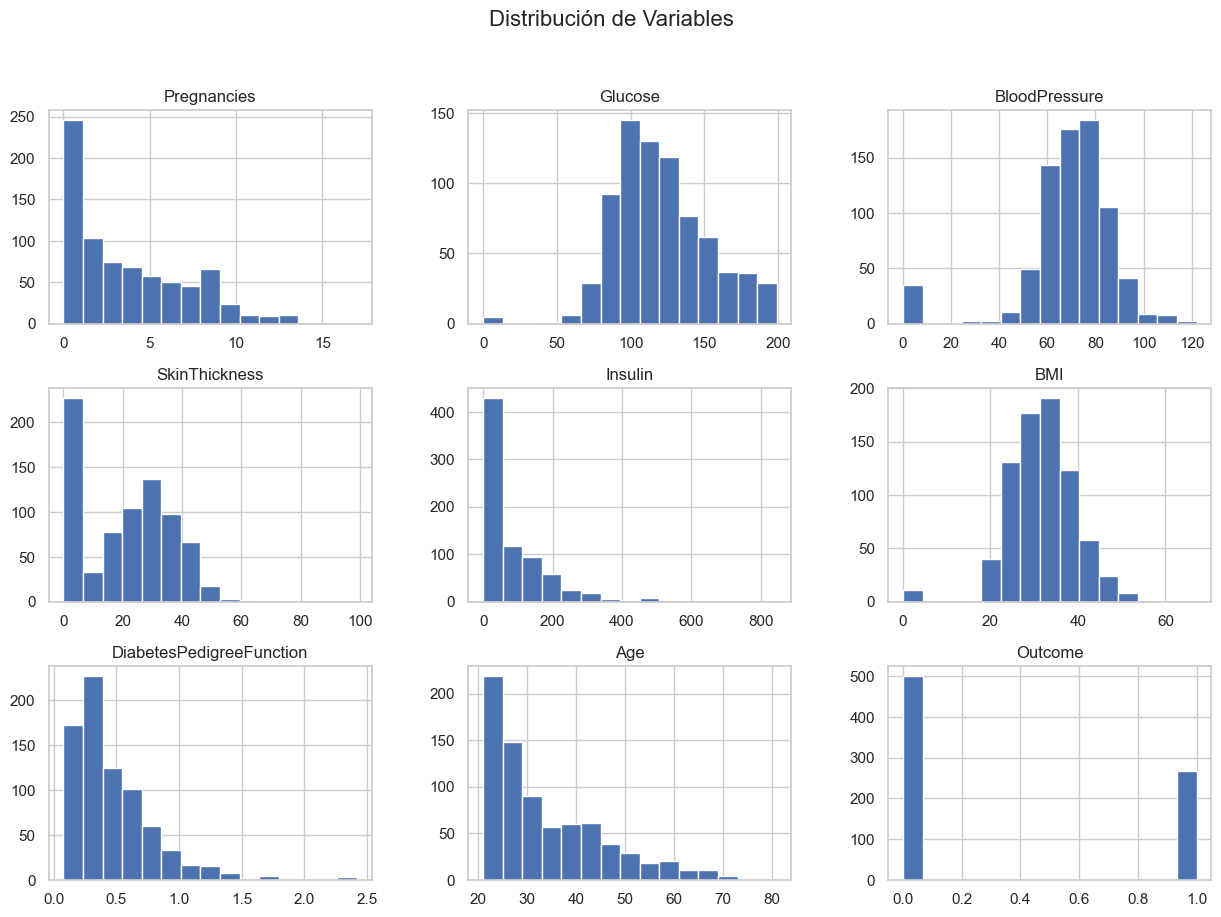

In [10]:
# Importar librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Crear histogramas para cada variable
df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Distribución de Variables", fontsize=16)
plt.show()

*Comentario*: Los histogramas nos ayudan a entender la distribución y detectar posibles sesgos o anomalías en los datos.

1. **Pregnancies (Embarazos):**
   - La mayoría de los pacientes tienen entre 0 y 5 embarazos. Sin embargo, hay unos pocos casos con un número de embarazos significativamente alto (> 10), lo que podría ser considerado un valor atípico.
   - La distribución está sesgada hacia la izquierda, con muchos valores bajos.

2. **Glucose (Glucosa):**
   - La distribución es aproximadamente normal, pero con una cantidad notable de valores bajos, algunos de los cuales son 0.
   - Los valores de 0 no son realistas y probablemente representan datos faltantes o no registrados, lo cual será necesario abordar más adelante.

3. **BloodPressure (Presión Arterial):**
   - La mayoría de los valores se concentran entre 60 y 90. La forma general sugiere una distribución aproximadamente normal.
   - Existen algunos valores de 0, lo cual no es fisiológicamente posible y señala la presencia de posibles datos faltantes.

4. **SkinThickness (Grosor de Piel):**
   - Hay una gran cantidad de valores en 0, lo cual es sospechoso, ya que el grosor del pliegue cutáneo normalmente no debería ser cero.
   - La distribución muestra una concentración de valores entre 10 y 40, con algunos valores altos que podrían ser atípicos.

5. **Insulin (Insulina):**
   - La mayoría de los valores están cerca de 0, lo cual es problemático, ya que sugiere que hay muchos valores faltantes o no medidos.
   - Además, la distribución es altamente sesgada a la derecha, con unos pocos valores extremadamente altos (> 600) que pueden ser considerados como outliers.

6. **BMI (Índice de Masa Corporal):**
   - La distribución del BMI se asemeja a una curva normal, con la mayoría de los valores concentrados entre 20 y 40.
   - Hay una cantidad de valores en 0, lo cual no es posible en un contexto real y sugiere la presencia de datos faltantes.

7. **DiabetesPedigreeFunction (Función de Pedigrí de Diabetes):**
   - La mayoría de los valores son bajos, distribuyéndose principalmente entre 0 y 1.
   - Hay algunos valores altos (> 1.5) que son menos comunes y podrían ser considerados como valores extremos.

8. **Age (Edad):**
   - La mayoría de los pacientes tienen entre 20 y 40 años, con un descenso gradual en la frecuencia para edades más avanzadas.
   - La distribución es asimétrica, con un sesgo hacia la derecha.

9. **Outcome (Resultado):**
   - Esta variable es binaria, con valores de 0 y 1.
   - Hay más pacientes etiquetados con 0 (sin diabetes) que con 1 (con diabetes). Esto indica un posible desbalance de clases, lo que podría afectar el rendimiento del modelo de clasificación.

**Observaciones Generales 📝**

- Las variables **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin** y **BMI** contienen valores de 0 que no son realistas y probablemente representan datos faltantes. Aún así, no podemos dicidir quitarlos como tal al desconocer el contexto del conjunto de datos.
- La mayoría de las variables tienen distribuciones sesgadas, lo que podría requerir transformaciones o ajustes durante el preprocesamiento de los datos.
- La variable objetivo (**Outcome**) está desbalanceada, lo que podría requerir técnicas especiales durante el entrenamiento del modelo para manejar este desbalance.


#### c) Valores Nulos o Atípicos ⚠️

**Verifique la presencia de valores nulos o atípicos y decida cómo manejarlos.**


Valores nulos en cada columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


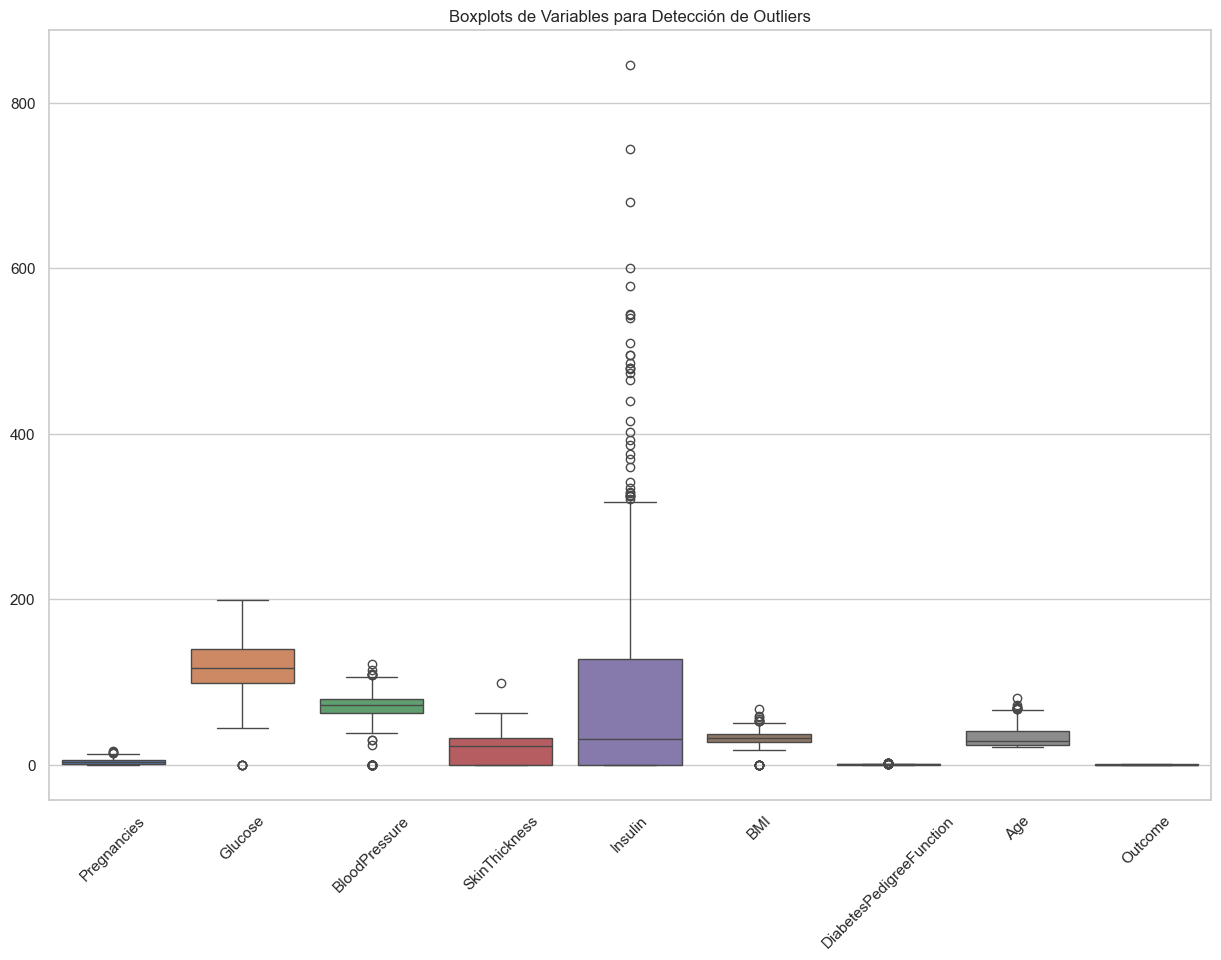

In [11]:
# Verificar valores nulos
print("Valores nulos en cada columna:")
print(df.isnull().sum())

# Detectar valores atípicos con boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Boxplots de Variables para Detección de Outliers")
plt.xticks(rotation=45)
plt.show()

*Comentario*: No hay valores nulos en el conjunto de datos, pero los boxplots indican la presencia de valores atípicos en algunas variables.

**Análisis de Outliers con Boxplots 📦**

- **Pregnancies (Embarazos):** Hay algunos valores atípicos en la parte superior, lo que indica que hay pacientes con un número de embarazos significativamente mayor al promedio.

- **Glucose (Glucosa):** Aunque no hay valores atípicos extremos, el rango de la glucosa se extiende bastante, y algunos valores bajos cercanos a 0 son sospechosos y podrían indicar datos faltantes.

- **BloodPressure (Presión Arterial):** Se observan algunos outliers en valores bajos. Al igual que con la glucosa, estos valores podrían representar datos faltantes, ya que la presión arterial humana no debería ser 0.

- **SkinThickness (Grosor de Piel):** Presenta varios valores atípicos hacia los valores más altos. Además, la presencia de múltiples valores en 0 en la parte inferior del gráfico indica que muchos datos están posiblemente faltantes.

- **Insulin (Insulina):** La variable *Insulin* muestra una gran cantidad de valores atípicos, especialmente en el rango superior (por encima de 200). Además, muchos valores cercanos a 0 podrían representar datos faltantes. Este patrón es típico en datos de salud, donde las mediciones de insulina pueden no estar disponibles para todos los pacientes.

- **BMI (Índice de Masa Corporal):** La mayoría de los valores se encuentran dentro de un rango razonable, pero algunos valores extremadamente bajos (incluyendo 0) y algunos valores altos podrían ser considerados atípicos.

- **DiabetesPedigreeFunction:** Aunque presenta algunos valores atípicos en la parte superior, la mayoría de los valores se encuentran dentro de un rango plausible.

- **Age (Edad):** Algunos outliers están presentes en la parte superior, lo que indica la presencia de pacientes mayores. Esto es esperable y no necesariamente indica un error en los datos.


**Manejo de Valores Atípicos**

Decidimos manejar los valores atípicos utilizando el método del rango intercuartílico (IQR).

In [12]:
# Función para eliminar outliers
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_filtrado

# Aplicar la función a las columnas numéricas
columnas_numericas = df.columns.drop('Outcome')
for columna in columnas_numericas:
    df = eliminar_outliers(df, columna)

# Verificar el nuevo tamaño del DataFrame
print("Tamaño del DataFrame después de eliminar outliers:", df.shape)

Tamaño del DataFrame después de eliminar outliers: (636, 9)


*Comentario*: Al eliminar los valores atípicos, mejoramos la calidad de los datos para el entrenamiento del modelo.

---

### 3. Entrenamiento con AutoGluon 🚀

**Utilice la opción `best_quality` del parámetro “preset” y la métrica `accuracy`.**

**Entrene varios modelos de clasificación con AutoGluon para predecir la columna "Outcome".**

*Nota*: Para instalar AutoGluon se sugiere ver la siguiente guía. Como recomendación personal sugerimos utilizar Conda. https://auto.gluon.ai/dev/install.html

In [13]:
from autogluon.tabular import TabularPredictor

# Definir la variable objetivo
objetivo = 'Outcome'

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Entrenar el modelo con AutoGluon
predictor = TabularPredictor(label=objetivo, eval_metric='accuracy').fit(
    train_data=train_data,
    presets='best_quality'
)

c:\Users\chama\.conda\envs\ag\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels\ag-20241004_233449"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
Memory Avail:       2.37 GB / 15.42 GB (15.4%)
Disk Space Avail:   235.94 GB / 476.07 GB (49.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will t

*Comentario*: AutoGluon automatiza el proceso de entrenamiento y selección de modelos, permitiendo enfocarnos en la interpretación de resultados.

---

### 4. Evaluación del Modelo 📝

#### a) Tabla de Mejores Modelos

**Despliegue una tabla de los mejores modelos en función de la precisión y destaque el mejor modelo.**

In [14]:
# Obtener la tabla de líderes
leaderboard = predictor.leaderboard(test_data, silent=True)
leaderboard

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_r95_BAG_L1,0.804688,0.812992,accuracy,0.267484,0.021054,3.440799,0.267484,0.021054,3.440799,1,True,106
1,CatBoost_r12_BAG_L1,0.781250,0.822835,accuracy,0.092258,0.008202,6.884800,0.092258,0.008202,6.884800,1,True,96
2,CatBoost_r198_BAG_L1,0.781250,0.820866,accuracy,0.093049,0.008104,5.724799,0.093049,0.008104,5.724799,1,True,103
3,LightGBM_r161_BAG_L1,0.781250,0.824803,accuracy,0.155752,0.035653,5.629738,0.155752,0.035653,5.629738,1,True,40
4,CatBoost_r6_BAG_L1,0.773438,0.832677,accuracy,0.086608,0.008410,6.124517,0.086608,0.008410,6.124517,1,True,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,NeuralNetFastAI_r65_BAG_L1,0.718750,0.818898,accuracy,0.314100,0.093680,28.987992,0.314100,0.093680,28.987992,1,True,67
107,NeuralNetFastAI_r37_BAG_L1,0.710938,0.834646,accuracy,0.370023,0.095233,36.653389,0.370023,0.095233,36.653389,1,True,53
108,NeuralNetFastAI_r194_BAG_L1,0.703125,0.807087,accuracy,0.277050,0.059154,3.892137,0.277050,0.059154,3.892137,1,True,95
109,NeuralNetFastAI_r172_BAG_L1,0.703125,0.820866,accuracy,0.363090,0.080194,25.287709,0.363090,0.080194,25.287709,1,True,88


*Comentario*: La tabla muestra los modelos ordenados por su desempeño en la métrica de precisión.

**Observaciones y Análisis 📊**

- El modelo con la mejor precisión en el conjunto de prueba es **XGBoost_r95_BAG_L1** con una precisión (`score_test`) de **0.8047**. También muestra un buen desempeño en el conjunto de validación (`score_val` = 0.8129).
- Varios modelos *CatBoost* presentan una precisión ligeramente menor pero aún competitiva. Por ejemplo, **CatBoost_r12_BAG_L1** tiene un `score_val` de **0.8228** y un `score_test` de **0.7812**, mostrando que puede generalizar bien.
- Los modelos basados en redes neuronales (*NeuralNetFastAI*) presentan tiempos de entrenamiento (*fit_time*) más largos y precisiones más bajas en comparación con los modelos basados en árboles (como *XGBoost* y *CatBoost*).
- **Tiempos de Predicción**: Aunque algunos modelos como *NeuralNetFastAI* tienen tiempos de predicción más altos (`pred_time_test` y `pred_time_val`), otros como *CatBoost* ofrecen tiempos de predicción significativamente más bajos, lo que puede ser una ventaja en aplicaciones que requieren decisiones rápidas, en este caso solo es una nota al pié pues no planeamos hacer nada con los modelos.


#### b) Matriz de Confusión

**Visualice la matriz de confusión del mejor modelo.**

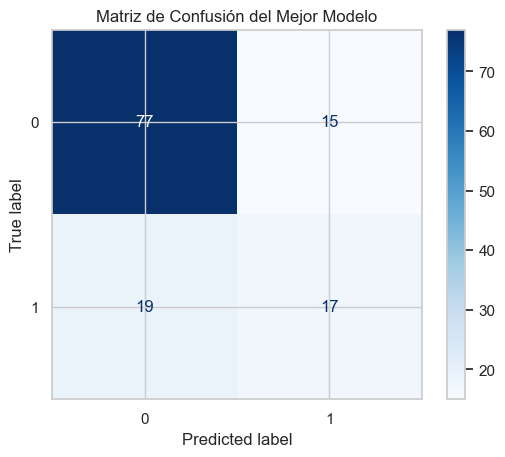

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Realizar predicciones en el conjunto de prueba
y_true = test_data[objetivo]
y_pred = predictor.predict(test_data.drop(columns=[objetivo]))

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión del Mejor Modelo")
plt.show()

*Comentario*: La matriz de confusión nos permite evaluar el rendimiento del modelo en términos de verdaderos y falsos positivos y negativos.

**Valores en la Matriz**

- **Verdaderos Negativos (77 en la celda superior izquierda):** El modelo predijo correctamente a 77 pacientes como "sin diabetes" (clase 0) cuando realmente no tenían diabetes. Este es el tipo de predicción más común en este caso, lo que refleja la tendencia del conjunto de datos donde hay más pacientes sin diabetes.

- **Falsos Positivos (15 en la celda superior derecha):** El modelo predijo "con diabetes" para 15 pacientes que en realidad no tenían diabetes. Estos son casos donde el modelo podría estar sobreestimando la presencia de diabetes.

- **Falsos Negativos (19 en la celda inferior izquierda):** El modelo predijo "sin diabetes" para 19 pacientes que realmente tenían diabetes. Este tipo de error es más crítico en un contexto clínico, ya que implica no detectar la presencia de la enfermedad.

- **Verdaderos Positivos (17 en la celda inferior derecha):** El modelo identificó correctamente a 17 pacientes como "con diabetes".


En general, aunque el modelo presenta un buen desempeño en términos de precisión general, hay margen para mejoras, especialmente en la detección correcta de pacientes con diabetes.

---

### 5. Reflexión 💭

Al trabajar con AutoGluon, hemos experimentado de primera mano cómo las herramientas de AutoML pueden acelerar en demasía el proceso de desarrollo de modelos competentes.

A continuación destacaremos algunas de las ventajas y desventajas que hemos descubierto:

**Ventajas de AutoGluon y AutoML:**

- **Eficiencia de Tiempo**: Automatiza tareas repetitivas, permitiendo enfocarse en análisis de resultados.
- **Facilidad de Uso**: Reduce la barrera de entrada para usuarios con menos experiencia técnica.
- **Optimización Automática**: Encuentra automáticamente el mejor modelo y parámetros.

**Desventajas de AutoML:**

- **Interpretabilidad Limitada**: Puede ser difícil entender cómo y por qué el modelo toma ciertas decisiones.
- **Menor Control**: Menos flexibilidad para ajustar manualmente hiperparámetros o arquitecturas específicas.
- **Recursos Computacionales**: Puede requerir hardware potente para ejecutar eficientemente.

En conclusión, herramientas como AutoGluon son excelentes para prototipado rápido y pueden ser muy útiles en situaciones donde el tiempo es crítico. Sin embargo, para aplicaciones que requieren interpretabilidad y ajuste **fino**, un enfoque manual puede ser más adecuado.